In [ ]:
! pip install tensorflow # install tensorflow library

In [ ]:
# verify installation
import tensorflow as tf  #importing tensorflow
from tensorflow import keras #fatser imlementation tensorflow

#check tf.keras version
print(tf.__version__)

2.18.0


In [ ]:
#enable table format
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

#disable table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

import pandas as pd  # for reading the dataset
import numpy as np  # for mathematical operations

import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import matplotlib.image as mpimg # image processing

from sklearn.model_selection import train_test_split # splitting the dataset

from tensorflow.keras.utils import to_categorical # for one hot encoding

from tensorflow.keras.preprocessing import image # for image processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator # for data augmentation
# preprocessing : resize the image, generate more images from given images,zomm the images

from tensorflow.keras.models import Sequential # type of model for coding
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Flatten,Dense,Dropout ,BatchNormalization,GlobalMaxPooling2D #Dense:Fully Connected
# Conv2D() - Convolutional layer (to extract features from the images)
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Loading dataset

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/fer2013.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/content/fer2013.csv')
data.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


Visualize the Data

<ipython-input-8-84f9b00ffb73>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_name,y=emotion_count,palette="viridis",ax=ax)


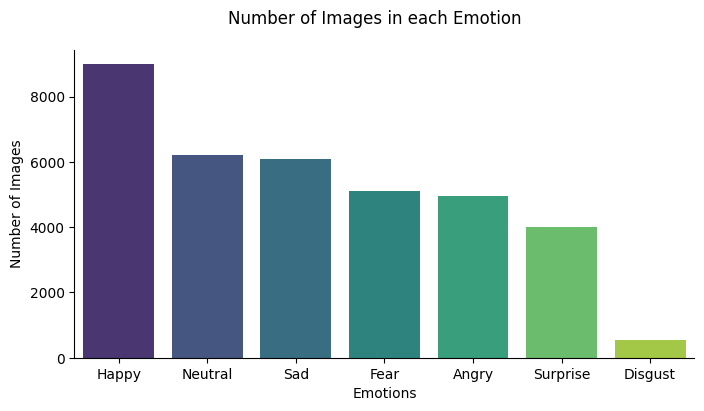

In [ ]:
#Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion_mapping = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# We  have the emotion_mapping dictionary
emotion_counts = data.emotion.value_counts()

# Access emotion counts with corresponding names
emotion_name = [emotion_mapping[label] for label in emotion_counts.index]
emotion_count = [count for count in emotion_counts.values]

# Create a bar plot using Matplotlib & Seaborn
fig, ax = plt.subplots(1,1,figsize=(8,4))
#sns.barplot(x=data.emotion.value_counts().keys() ,y=data.emotion.value_counts().values,palette="viridis",ax=ax)
sns.barplot(x=emotion_name,y=emotion_count,palette="viridis",ax=ax)
plt.xlabel("Emotions")
plt.ylabel("Number of Images")
ax.spines['top'].set_visible(False) # it will remove the top boundry line
ax.spines['right'].set_visible(False) # it will remove the right boundry line
fig.suptitle("Number of Images in each Emotion")
plt.show()

Shuffle the rows in dataset

The sample() function in pandas can be used to shuffle the data. Setting the frac parameter to 1 ensures that all rows are included in the shuffled dataset. It helps prevents Bias and improves Generalization

In [ ]:
data = data.sample(frac=1)
data.head(2)

,emotion,pixels,Usage
24308,4,27 27 29 28 29 31 89 104 107 112 109 109 59 17...,Training
20518,3,27 24 39 35 31 51 34 22 40 24 32 76 98 121 154...,Training


One Hot Encoding

Best for multi-class classification

In [ ]:
classes = to_categorical(data[['emotion']], num_classes=7)
classes

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

Data Preprocessing

In [ ]:
#Changing image pixels to Numpy array
pixels = data["pixels"].astype(str).str.split(" ").tolist()

# Convert lists of strings to lists of integers, handling empty strings and invalid characters
# Pad shorter rows with 0 to ensure uniform length
max_len = max(len(row) for row in pixels)  # Find the maximum length
pixels = np.array([[int(pixel) if pixel.isdigit() else 0 for pixel in row] + [0] * (max_len - len(row)) for row in pixels], dtype=np.uint8)

print(pixels.shape)  # Check the shape of the final array

(35887, 2304)


In [ ]:
pixels.shape

(623, 2304)

In [ ]:
#Changing image pixels to Numpy array
pixels = data["pixels"].astype(str).str.split(" ").tolist()

# Convert lists of strings to lists of integers, handling empty strings and invalid characters
# Pad shorter rows with 0 to ensure uniform length
# Find the maximum length of the inner lists: This line remains unchanged
max_len = max(len(row) for row in pixels)
# Reshape the pixels array using the calculated maximum length
pixels = np.array([
    [int(pixel) if pixel.isdigit() else 0 for pixel in row] + [0] * (max_len - len(row))
    for row in pixels
], dtype=np.uint8)

print(pixels.shape)  # Check the shape of the final array

# converting in float32 to use 32- bit precision
pixels = pixels.astype('float32')
#normalizing the input values
pixels /= 255

# calculate new shape based on actual number of images
num_images = pixels.shape[0]
# assuming image dimensions are 48x48x1
pixels = pixels.reshape((num_images, 48, 48, 1))
# The total number of elements in the pixels array is now compatible with the new shape.
print(pixels.shape)  # Verify the new shape

(35887, 2304)
(35887, 48, 48, 1)


Train test validation split¶

Now, we have 35887 images with each containing 48x48 pixels. We will split the data into train,test and Validation data to feed and evaluate and validate our data with the ratio of 10%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pixels, classes, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)


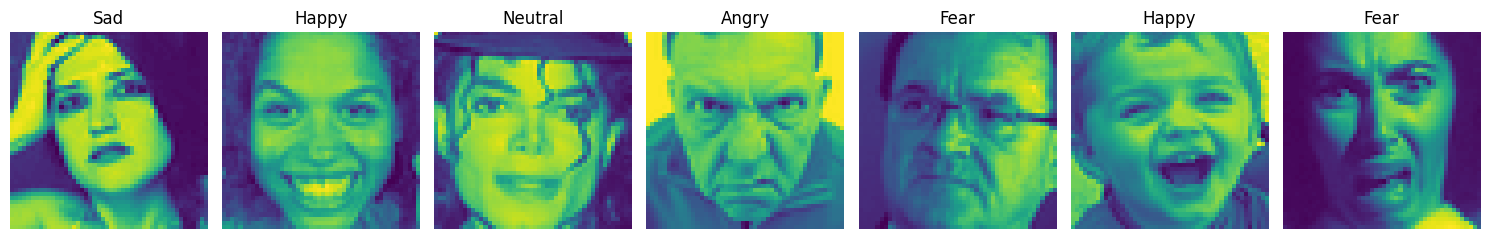

In [ ]:
# visualizing the training input
plt.figure(figsize=(15,23))
for i in range(7):
  img = np.squeeze(X_train[i])
  plt.subplot(1,7,i+1)
  plt.imshow(img)
  index = np.argmax(y_train[i])
  plt.title(emotion_mapping[index])
  plt.axis('off') # turn off the axis numbering
plt.tight_layout()
plt.show()

In [ ]:
train_datagen=ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                                 height_shift_range = 0.1, #shift the image height by 10%
                                 horizontal_flip = True, #flip the image horizontally
                                 zoom_range = 0.2) #zoom the images by 20%


valgen = ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                               height_shift_range = 0.1, #shift the image height by 10%
                               horizontal_flip = True, #shift the image height by 10%
                               zoom_range = 0.2) #zoom the images by 20%

In [ ]:
train_datagen.fit(X_train)
valgen.fit(X_val)

In [ ]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
validation_generator = valgen.flow(X_val, y_val, batch_size=64)

Visual Representation of ImageDataGenerator

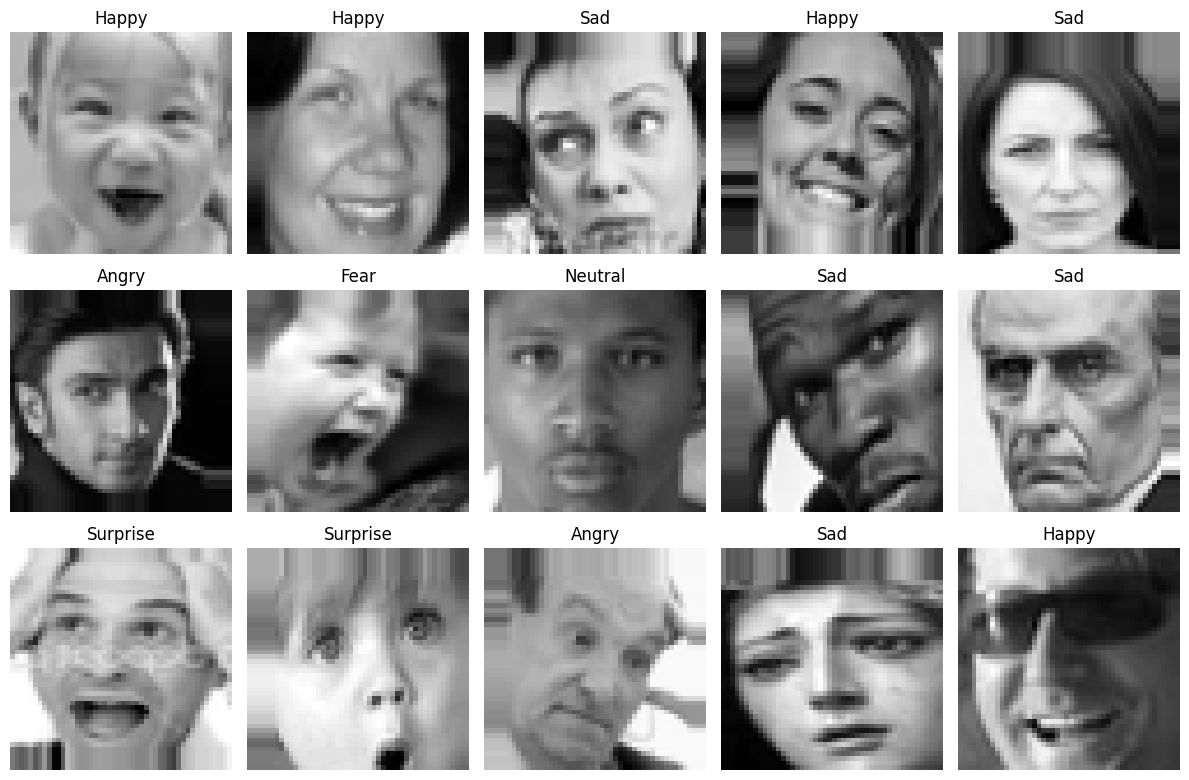

In [ ]:
from IPython import display
display.clear_output(wait=True)  # Optionally clear previous output
plt.figure(figsize=(12,8))
for i in range(0,15):
    plt.subplot(3,5,i+1)
    for X_batch , Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image.squeeze(), cmap='gray')  # Added cmap='gray' for better visualization
        index = np.argmax(Y_batch[0])  # Fixed the index to 0 for the first image
        plt.title(emotion_mapping[index])
        plt.axis('off')
        break  # Break out of the inner loop after plotting one image
plt.tight_layout()
plt.show()

Build the CNN model


1.Conlutional Layer
2.ReLu
3.Pooling Layer
4.Fully Connected Layer (Dense)

In [ ]:
# Model Building

model= Sequential() # seqential composition
# add a layer : Dense , Dropout , activation and cnn work better for images

# Input : layer -1
model.add(Conv2D(64,(5,5),input_shape=(48, 48,1),activation='relu'))
# Conv2D for images , Conv3D for video
# Convultional layers -  with 64 filter/feature of 3 height and 3 width and height and width will be always odd number.
# This class allows to create convoluional neural network to extract feature from images
# INPUT : 48x48x3
# CONV : 64 filters/feature ,3x3
# Output : 48x48x64
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling2D helps to reduce the size of the data
#7x7x3 _max pooling size _ output:4x4x3
#48x48x64_max pooling size_output:24x24x64
# it's divides size by 2 as it is MaxPooling 2D

#layer -2
model.add(Conv2D(128,(5,5),  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#layer -3
model.add(Conv2D(256,(5,5),  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


#layer - 4
model.add(Flatten()) # converts multi dimenional array to 1D channel
model.add(Dense(128,activation = 'relu')) # 256 - number of output nodes in the hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.25))

#Output - layer
model.add(Dense(7, activation='softmax'))
#Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
# Multi-Class Classification
#model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

# 2 classes , binary_crossentropy , sigmoid activation is  used
# more than 2 , categorical_crossentropy , softmax is used
earlystop = EarlyStopping(patience=5)
callbacks = [earlystop]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 44, 44, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 18, 18, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,160,455 (4.43 MB)

 Trainable params: 1,159,303 (4.42 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
# train the model
training = model.fit(train_generator,epochs=1, batch_size=64, callbacks= callbacks,
                     validation_data=validation_generator)

#overfitting : when training accuracy is higher than val_accuracy[2%]
#underfitting : when val_accuracy is higher than training accuracy[2%]
#appropriate : abs(training accuracy-val_accuracy ) ~ 2%

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


455/455 ━━━━━━━━━━━━━━━━━━━━ 475s 1s/step - accuracy: 0.2226 - loss: 2.2462 - val_accuracy: 0.2672 - val_loss: 1.8045


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


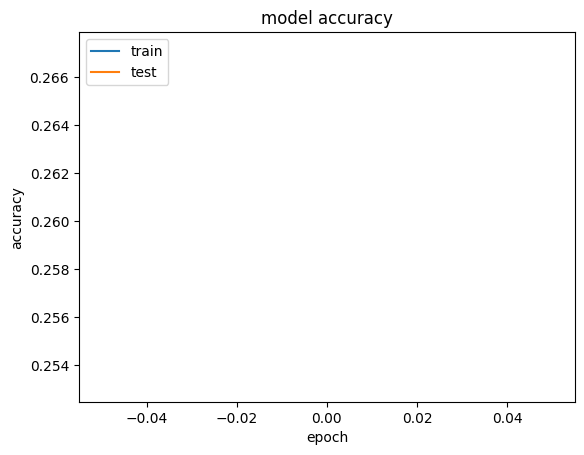

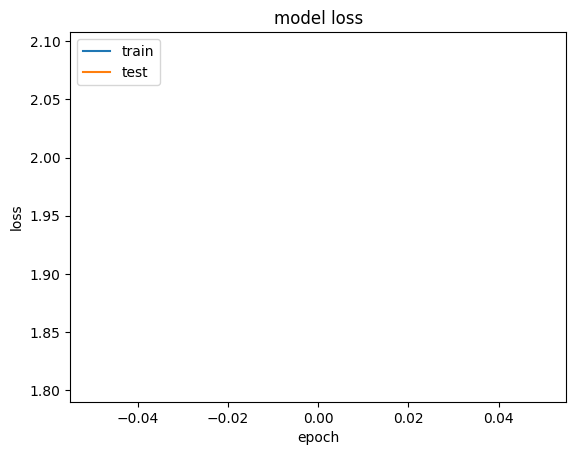

In [ ]:
# accuracy visualization

import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step


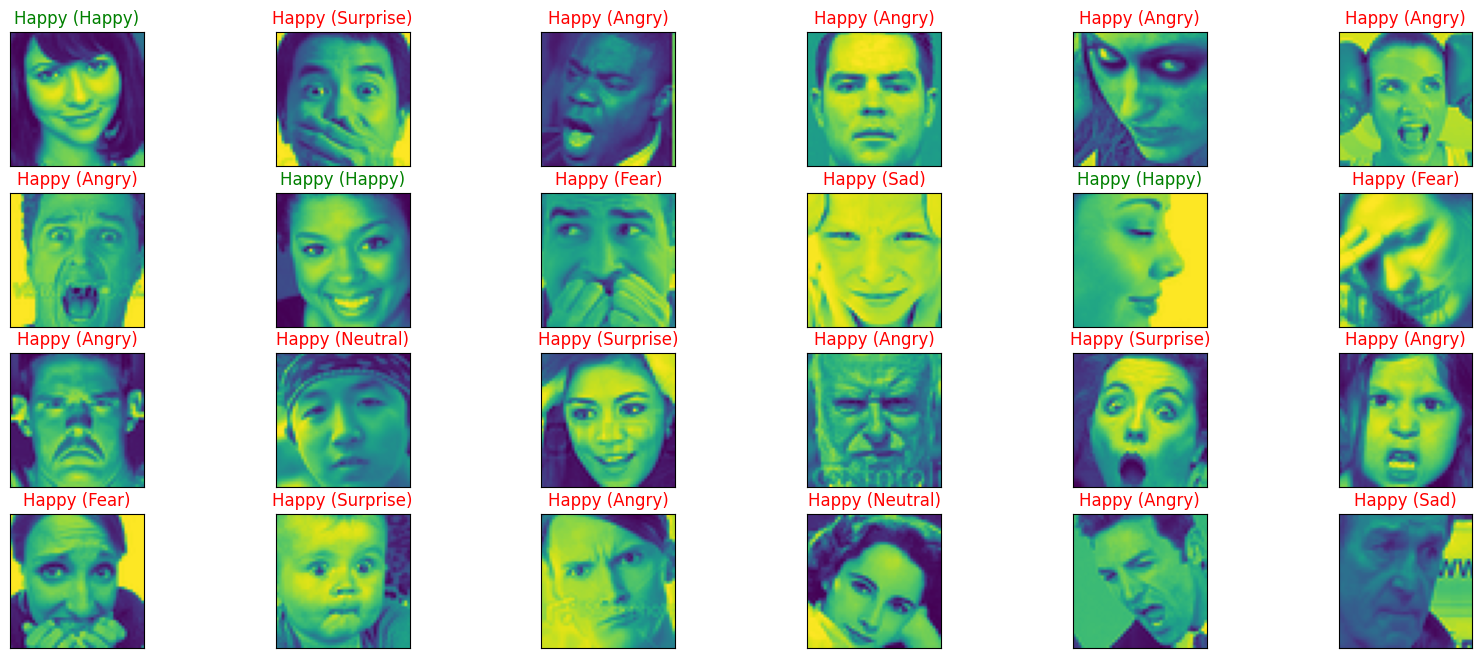

In [ ]:
# prediction
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

#visulaization
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = emotion_mapping[(y_pred[index])]
    true_index = emotion_mapping[np.argmax(y_test,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.478     0.022     0.041       511
           1      0.000     0.000     0.000        64
           2      0.212     0.045     0.074       535
           3      0.529     0.517     0.523       923
           4      0.218     0.624     0.324       627
           5      0.444     0.198     0.274       359
           6      0.291     0.307     0.299       570

    accuracy                          0.320      3589
   macro avg      0.310     0.245     0.219      3589
weighted avg      0.365     0.320     0.283      3589

